In [2]:
import pandas as pd
data_depression = pd.read_csv('depression_dataset_reddit_cleaned.csv')
data_depression

FileNotFoundError: [Errno 2] No such file or directory: 'depression_dataset_reddit_cleaned.csv'

In [6]:
data_depression["clean_text"][0]

'we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat

<Axes: xlabel='is_depression', ylabel='count'>

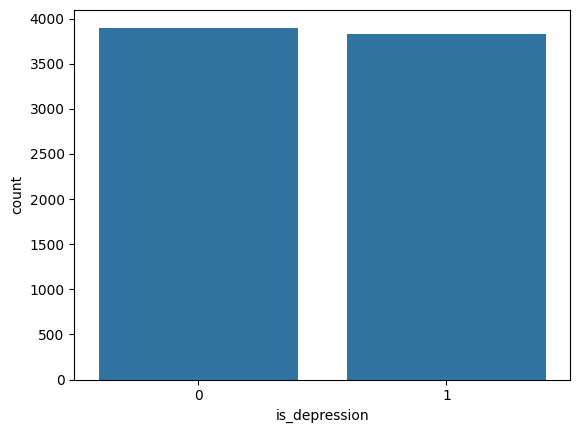

In [7]:
import seaborn as sns
sns.countplot(data=data_depression, x="is_depression")

In [8]:
import nltk
#регулярные выражения
import re
from nltk.corpus import stopwords

In [9]:
nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
nltk.download('omw-1.4') #для обработки новой структуры каталогов для wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
new_text = []
lemmatize = nltk.WordNetLemmatizer()
for i in data_depression.clean_text:
    #удаляем неалфавитные символы
    text = re.sub("[^a-zA-Z]"," ",i)
    # токенизируем слова
    text = nltk.word_tokenize(text,language = "english")
    # лемматирзируем слова
    text = [lemmatize.lemmatize(word) for word in i]
    # соединяем слова
    text = "".join(text)
    new_text.append(text)

In [11]:
new_text[:1]

['we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm cha

In [12]:
# импортируем модуль
from sklearn.feature_extraction.text import CountVectorizer
#мешок слов
count = CountVectorizer(stop_words="english")
# проводим преобразование текста
matrix = count.fit_transform(new_text).toarray()

In [13]:
matrix.shape

(7731, 18529)

In [14]:
matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
print(matrix[0][:400])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
X=matrix
y = data_depression["is_depression"].values
#Далее разделим выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result_bayes = nb.fit(x_train, y_train)
nb.score(x_test,y_test)

0.8436520376175548

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result_logreg = logreg.fit(x_train, y_train)
logreg.score(x_test,y_test)

0.9565047021943573

In [19]:
#адаптивный бустинг

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

modelClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

modelclf_fit = modelClf.fit(X_train, y_train)
modelClf.score(X_valid, y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9376959247648903

In [20]:
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
x_train.shape

(5179, 18529)

In [22]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0,2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
11/11 [==============================] - 6s 396ms/step - loss: 0.6019 - accuracy: 0.7681 - val_loss: 0.4933 - val_accuracy: 0.9083
Epoch 2/20
11/11 [==============================] - 2s 171ms/step - loss: 0.4259 - accuracy: 0.9309 - val_loss: 0.3643 - val_accuracy: 0.9334
Epoch 3/20
11/11 [==============================] - 2s 169ms/step - loss: 0.2983 - accuracy: 0.9614 - val_loss: 0.2686 - val_accuracy: 0.9444
Epoch 4/20
11/11 [==============================] - 2s 188ms/step - loss: 0.2037 - accuracy: 0.9716 - val_loss: 0.2059 - val_accuracy: 0.9487
Epoch 5/20
11/11 [==============================] - 2s 192ms/step - loss: 0.1409 - accuracy: 0.9763 - val_loss: 0.1701 - val_accuracy: 0.9549
Epoch 6/20
11/11 [==============================] - 3s 255ms/step - loss: 0.1003 - accuracy: 0.9803 - val_loss: 0.1445 - val_accuracy: 0.9553
Epoch 7/20
11/11 [==============================] - 3s 266ms/step - loss: 0.0749 - accuracy: 0.9844 - val_loss: 0.1333 - val_accuracy: 0.9553
Epoch 

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
import matplotlib.pyplot as plt

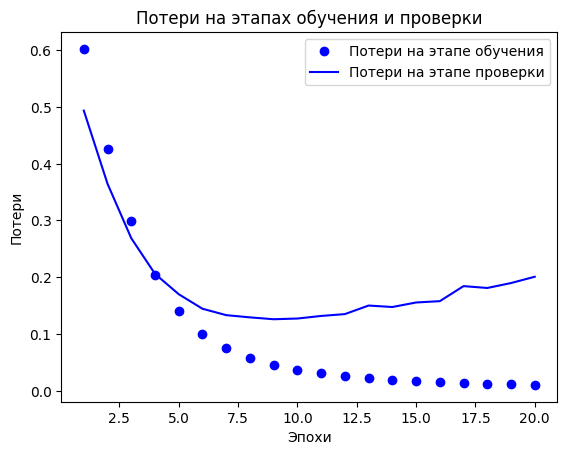

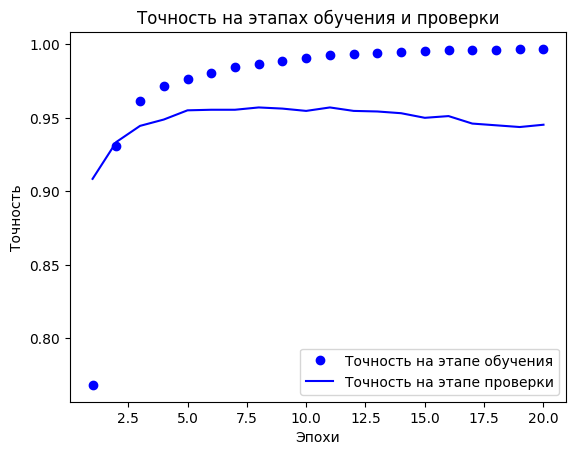

In [25]:
# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label = 'Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label = 'Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# построение графика точности на этапах обучения и проверки
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [26]:
Y_pred=model.predict(x_test)
# задаем порог 0,5 для классификации текста
Y_pred=(Y_pred>=0.5).astype("int")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))

80/80 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1297
           1       0.95      0.94      0.94      1255

    accuracy                           0.95      2552
   macro avg       0.95      0.95      0.95      2552
weighted avg       0.95      0.95      0.95      2552

[[1234   63]
 [  77 1178]]


In [27]:
data = pd.read_csv('IMDB Dataset.csv')

In [28]:
data = data.head(5000)

In [29]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [30]:
data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})

# Проверка результата
print(data.head())

                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [31]:
data["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

<Axes: xlabel='sentiment', ylabel='count'>

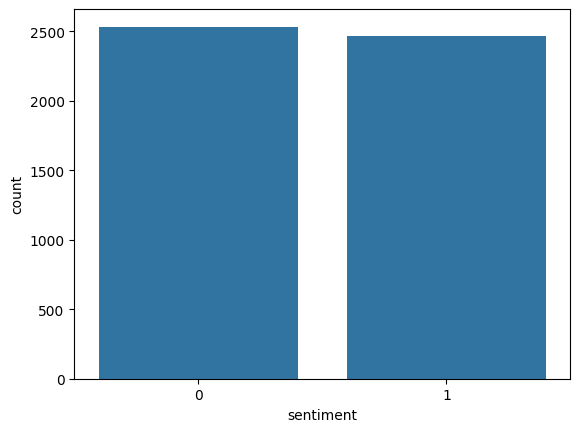

In [32]:
import seaborn as sns
sns.countplot(data=data, x="sentiment")

In [33]:

from nltk.corpus import stopwords

In [34]:
import nltk
import re

new_text = []
lemmatize = nltk.WordNetLemmatizer()

for i in data.review:
    # Удаляем неалфавитные символы
    text = re.sub("[^a-zA-Z]", " ", i)
    # Токенизируем слова
    tokens = nltk.word_tokenize(text, language="english")
    # Лемматизируем слова
    lemmatized_tokens = [lemmatize.lemmatize(token) for token in tokens]
    # Соединяем слова
    text = " ".join(lemmatized_tokens)
    new_text.append(text)

In [35]:
new_text[:1]

['One of the other reviewer ha mentioned that after watching just Oz episode you ll be hooked They are right a this is exactly what happened with me br br The first thing that struck me about Oz wa it brutality and unflinching scene of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pull no punch with regard to drug sex or violence Its is hardcore in the classic use of the word br br It is called OZ a that is the nickname given to the Oswald Maximum Security State Penitentary It focus mainly on Emerald City an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangsta Latinos Christians Italians Irish and more so scuffle death stare dodgy dealing and shady agreement are never far away br br I would say the main appeal of the show is due to the fact that it go where other show wouldn t dare Forget pretty pictur

In [36]:

# импортируем модуль
from sklearn.feature_extraction.text import CountVectorizer
#мешок слов
count = CountVectorizer(stop_words="english")
# проводим преобразование текста
matrix = count.fit_transform(new_text).toarray()

In [37]:
matrix.shape

(5000, 35210)

In [38]:
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
print(matrix[0][:400])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
X=matrix
y = data["sentiment"].values
#Далее разделим выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result_bayes = nb.fit(x_train, y_train)
nb.score(x_test,y_test)

0.6442424242424243

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result_logreg = logreg.fit(x_train, y_train)
logreg.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8503030303030303

In [43]:
#адаптивный бустинг

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

modelClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

modelclf_fit = modelClf.fit(X_train, y_train)
modelClf.score(X_valid, y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7884848484848485

In [44]:
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
x_train.shape

(3350, 35210)

In [51]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0,2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/10
7/7 [==============================] - 8s 997ms/step - loss: 0.6340 - accuracy: 0.6516 - val_loss: 0.5387 - val_accuracy: 0.7848
Epoch 2/10
7/7 [==============================] - 3s 416ms/step - loss: 0.4225 - accuracy: 0.8639 - val_loss: 0.4338 - val_accuracy: 0.8352
Epoch 3/10
7/7 [==============================] - 2s 335ms/step - loss: 0.2587 - accuracy: 0.9436 - val_loss: 0.3856 - val_accuracy: 0.8539
Epoch 4/10
7/7 [==============================] - 2s 313ms/step - loss: 0.1621 - accuracy: 0.9707 - val_loss: 0.3719 - val_accuracy: 0.8564
Epoch 5/10
7/7 [==============================] - 4s 563ms/step - loss: 0.1355 - accuracy: 0.9722 - val_loss: 0.4171 - val_accuracy: 0.8382
Epoch 6/10
7/7 [==============================] - 2s 325ms/step - loss: 0.0790 - accuracy: 0.9916 - val_loss: 0.3716 - val_accuracy: 0.8582
Epoch 7/10
7/7 [==============================] - 2s 316ms/step - loss: 0.0557 - accuracy: 0.9958 - val_loss: 0.3806 - val_accuracy: 0.8618
Epoch 8/10
7/7 [====

In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
import matplotlib.pyplot as plt

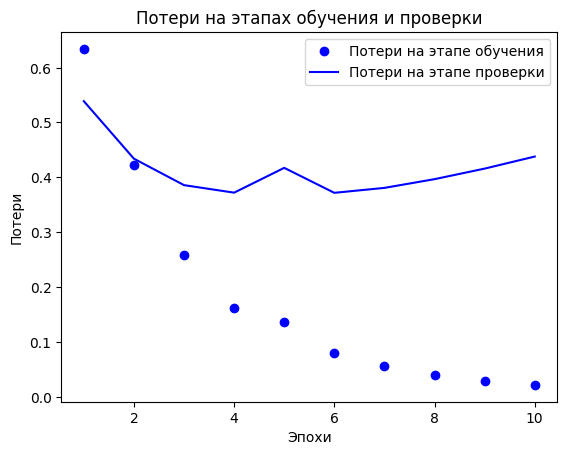

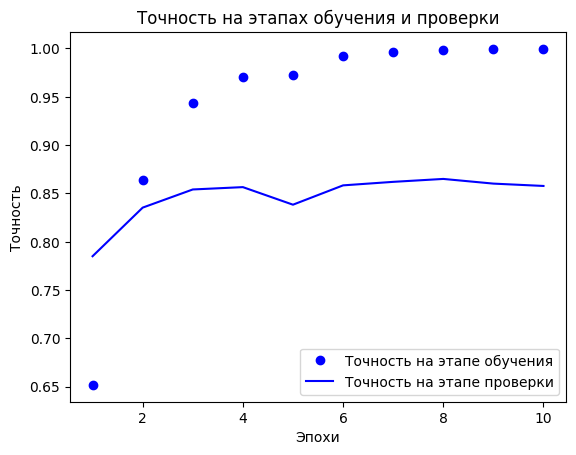

In [54]:
# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

# построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label = 'Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label = 'Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# построение графика точности на этапах обучения и проверки
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [3]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [4]:
# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
	return tokens

In [5]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [6]:
# load document
in_filename = 'republic_clean.txt'
doc = load_doc(in_filename)
print(doc[:200])



BOOK I.

I went down yesterday to the Piraeus with Glaucon the son of Ariston,
that I might offer up my prayers to the goddess (Bendis, the Thracian
Artemis.); and also because I wanted to see in what


In [5]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS

wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(doc)

<Axes: >

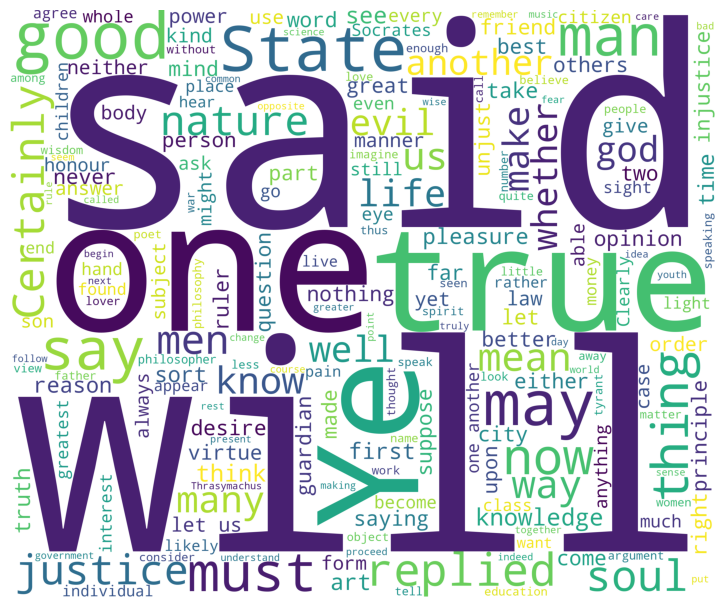

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [10]:
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['book', 'i', 'i', 'went', 'down', 'yesterday', 'to', 'the', 'piraeus', 'with', 'glaucon', 'the', 'son', 'of', 'ariston', 'that', 'i', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', 'bendis', 'the', 'thracian', 'artemis', 'and', 'also', 'because', 'i', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'festival', 'which', 'was', 'a', 'new', 'thing', 'i', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'inhabitants', 'but', 'that', 'of', 'the', 'thracians', 'was', 'equally', 'if', 'not', 'more', 'beautiful', 'when', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'spectacle', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'city', 'and', 'at', 'that', 'instant', 'polemarchus', 'the', 'son', 'of', 'cephalus', 'chanced', 'to', 'catch', 'sight', 'of', 'us', 'from', 'a', 'distance', 'as', 'we', 'were', 'starting', 'on', 'our', 'way', 'home', 'and', 'told', 'his', 'servant', 'to', 'run', 'and', 'bid',

In [11]:
import nltk
from nltk.probability import FreqDist
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.most_common(5)


[('the', 7085), ('and', 5753), ('of', 4664), ('to', 3296), ('is', 2512)]

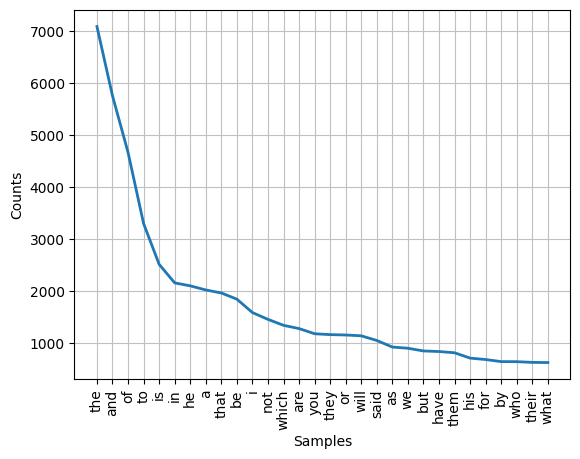

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
fdist.plot(30,cumulative=False)

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words("english")

tokens = [word for word in tokens if not word in english_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


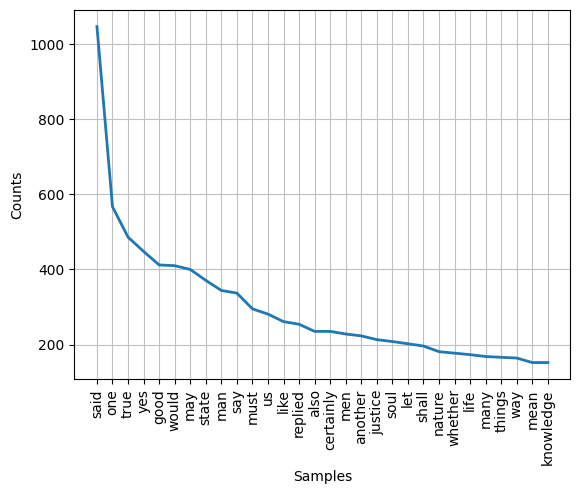

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.plot(30,cumulative=False)

In [15]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(tokens))

<Axes: >

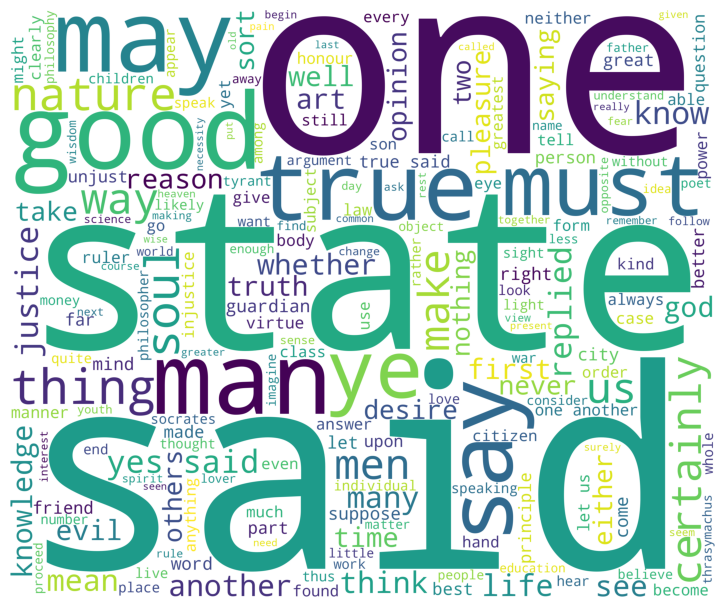

In [16]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [17]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
	# select sequence of tokens
	seq = tokens[i-length:i]
	# convert into a line
	line = ' '.join(seq)
	# store
	sequences.append(line)
print('Total Sequences: %d' % len(sequences))

# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

Total Sequences: 49306


In [18]:
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

In [19]:
lines[:2]

['book went yesterday piraeus glaucon son ariston might offer prayers goddess bendis thracian artemis also wanted see manner would celebrate festival new thing delighted procession inhabitants thracians equally beautiful finished prayers viewed spectacle turned direction city instant polemarchus son cephalus chanced catch sight us distance starting way home told servant run',
 'went yesterday piraeus glaucon son ariston might offer prayers goddess bendis thracian artemis also wanted see manner would celebrate festival new thing delighted procession inhabitants thracians equally beautiful finished prayers viewed spectacle turned direction city instant polemarchus son cephalus chanced catch sight us distance starting way home told servant run bid']

In [20]:
# integer encode sequences of words
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
# получение уникальных токенов отсортированных по частоте повторяемости
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [21]:
sequences[:2]

[[927,
  925,
  7283,
  2748,
  115,
  164,
  2127,
  88,
  700,
  3942,
  2124,
  7282,
  7281,
  7280,
  16,
  1146,
  35,
  78,
  6,
  7279,
  1488,
  437,
  66,
  1145,
  3946,
  1296,
  3945,
  250,
  335,
  1741,
  3942,
  7278,
  3944,
  490,
  924,
  58,
  2747,
  410,
  164,
  1295,
  3943,
  2122,
  131,
  12,
  699,
  2746,
  28,
  573,
  334,
  923,
  597],
 [925,
  7283,
  2748,
  115,
  164,
  2127,
  88,
  700,
  3942,
  2124,
  7282,
  7281,
  7280,
  16,
  1146,
  35,
  78,
  6,
  7279,
  1488,
  437,
  66,
  1145,
  3946,
  1296,
  3945,
  250,
  335,
  1741,
  3942,
  7278,
  3944,
  490,
  924,
  58,
  2747,
  410,
  164,
  1295,
  3943,
  2122,
  131,
  12,
  699,
  2746,
  28,
  573,
  334,
  923,
  597,
  2749]]

In [22]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7284

In [23]:
# separate into input and output
import numpy as np
from keras.utils import to_categorical

sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
#кодирование выходных значений в двоичное матричное представление
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

In [22]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
# define model
model = Sequential()
#50 - это число выходов в Embedding слое
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            364200    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7284)              735684    
                                                                 
Total params: 1250784 (4.77 MB)
Trainable params: 1250784 (4.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=20)

Epoch 1/20
386/386 [==============================] - 107s 264ms/step - loss: 7.8110 - accuracy: 0.0204
Epoch 2/20
386/386 [==============================] - 98s 255ms/step - loss: 7.5267 - accuracy: 0.0212
Epoch 3/20
386/386 [==============================] - 100s 260ms/step - loss: 7.4612 - accuracy: 0.0215
Epoch 4/20
386/386 [==============================] - 100s 259ms/step - loss: 7.3843 - accuracy: 0.0218
Epoch 5/20
386/386 [==============================] - 109s 282ms/step - loss: 7.3124 - accuracy: 0.0222
Epoch 6/20
386/386 [==============================] - 101s 261ms/step - loss: 7.2493 - accuracy: 0.0231
Epoch 7/20
386/386 [==============================] - 100s 260ms/step - loss: 7.1872 - accuracy: 0.0235
Epoch 8/20
386/386 [==============================] - 99s 257ms/step - loss: 7.1203 - accuracy: 0.0240
Epoch 9/20
386/386 [==============================] - 102s 265ms/step - loss: 7.0563 - accuracy: 0.0240
Epoch 10/20
386/386 [==============================] - 99s 256ms/s

In [24]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [26]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [27]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [28]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

describe world cocytus styx ghosts earth sapless shades similar words mention causes shudder pass inmost soul hears say horrible stories may use kind danger nerves guardians may rendered excitable effeminate real danger said must true another nobler strain must composed sung us clearly shall proceed get rid weepings wailings famous men



In [29]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 62ms/step
man man yes said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said


In [30]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Определение модели
model = Sequential()

# Добавление слоя Embedding
model.add(Embedding(vocab_size, 50, input_length=seq_length))

# Добавление первого LSTM слоя
model.add(LSTM(100, return_sequences=True))

# Добавление слоя Dropout после первого LSTM слоя
model.add(Dropout(0.5)) # 0.5 - это вероятность отключения нейронов

# Добавление второго LSTM слоя
model.add(LSTM(100))

# Добавление слоя Dropout после второго LSTM слоя
model.add(Dropout(0.5)) # 0.5 - это вероятность отключения нейронов

# Добавление Dense слоя
model.add(Dense(100, activation='relu'))

# Добавление выходного слоя
model.add(Dense(vocab_size, activation='softmax'))

# Вывод информации о модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            364200    
                                                                 
 lstm_2 (LSTM)               (None, 50, 100)           60400     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 7284)             

In [32]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
386/386 [==============================] - 113s 265ms/step - loss: 7.8065 - accuracy: 0.0199
Epoch 2/10
386/386 [==============================] - 105s 270ms/step - loss: 7.5402 - accuracy: 0.0212
Epoch 3/10
386/386 [==============================] - 102s 265ms/step - loss: 7.4911 - accuracy: 0.0212
Epoch 4/10
386/386 [==============================] - 102s 264ms/step - loss: 7.4571 - accuracy: 0.0214
Epoch 5/10
386/386 [==============================] - 103s 268ms/step - loss: 7.4075 - accuracy: 0.0218
Epoch 6/10
386/386 [==============================] - 112s 289ms/step - loss: 7.3491 - accuracy: 0.0226
Epoch 7/10
386/386 [==============================] - 103s 266ms/step - loss: 7.2910 - accuracy: 0.0226
Epoch 8/10
386/386 [==============================] - 107s 278ms/step - loss: 7.2356 - accuracy: 0.0230
Epoch 9/10
386/386 [==============================] - 103s 266ms/step - loss: 7.1832 - accuracy: 0.0235
Epoch 10/10
386/386 [==============================] - 102s 264m

In [33]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [34]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [ ]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [35]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [36]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

unjust unjust incapable common action nay speak men evil acting time vigorously together strictly true perfectly evil would laid hands upon one another evident must remnant justice enabled combine would injured one another well victims halfvillains enterprises whole villains utterly unjust would utterly incapable action believe truth matter said first whether



In [37]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 31ms/step
good said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said said


In [38]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Определение модели
model = Sequential()

# Добавление слоя Embedding
model.add(Embedding(vocab_size, 50, input_length=seq_length))

# Добавление первого LSTM слоя
model.add(LSTM(100, return_sequences=True))

# Добавление слоя Dropout после первого LSTM слоя
model.add(Dropout(0.5)) # 0.5 - это вероятность отключения нейронов

# Добавление второго LSTM слоя
model.add(LSTM(100))

# Добавление слоя Dropout после второго LSTM слоя
model.add(Dropout(0.5)) # 0.5 - это вероятность отключения нейронов

# Добавление Dense слоя
model.add(Dense(100, activation='relu'))

# Добавление выходного слоя
model.add(Dense(vocab_size, activation='softmax'))

# Вывод информации о модели
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 50)            364200    
                                                                 
 lstm_4 (LSTM)               (None, 50, 100)           60400     
                                                                 
 dropout_2 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 7284)             

In [39]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=50)

Epoch 1/50
386/386 [==============================] - 109s 268ms/step - loss: 7.7986 - accuracy: 0.0208
Epoch 2/50
386/386 [==============================] - 105s 271ms/step - loss: 7.5389 - accuracy: 0.0212
Epoch 3/50
386/386 [==============================] - 109s 283ms/step - loss: 7.4925 - accuracy: 0.0212
Epoch 4/50
386/386 [==============================] - 109s 282ms/step - loss: 7.4633 - accuracy: 0.0214
Epoch 5/50
386/386 [==============================] - 111s 287ms/step - loss: 7.4286 - accuracy: 0.0219
Epoch 6/50
386/386 [==============================] - 112s 289ms/step - loss: 7.3815 - accuracy: 0.0221
Epoch 7/50
386/386 [==============================] - 111s 289ms/step - loss: 7.3267 - accuracy: 0.0229
Epoch 8/50
386/386 [==============================] - 107s 278ms/step - loss: 7.2745 - accuracy: 0.0233
Epoch 9/50
386/386 [==============================] - 108s 281ms/step - loss: 7.2218 - accuracy: 0.0239
Epoch 10/50
386/386 [==============================] - 103s 267m

In [40]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [41]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [42]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [43]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [44]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

saying intended imply must come understanding mimetic art whether poets narrating stories allowed us imitate whether whole part latter parts imitation prohibited mean suspect ask whether tragedy comedy shall admitted state yes said may question really know yet whither argument may blow thither go go said adeimantus let ask whether guardians



In [45]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 45ms/step
fairer investigation approver say said would say whither would would assured derives errs us percipient eyes say knowledge say stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger stronger


In [41]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Определение модели
model = Sequential()

# Добавление слоя Embedding
model.add(Embedding(vocab_size, 50, input_length=seq_length))

# Добавление первого LSTM слоя
model.add(LSTM(100, return_sequences=True))

# Добавление слоя Dropout после первого LSTM слоя
model.add(Dropout(0.5)) # 0.5 - это вероятность отключения нейронов

# Добавление второго LSTM слоя
model.add(LSTM(100))

# Добавление слоя Dropout после второго LSTM слоя
model.add(Dropout(0.5)) # 0.5 - это вероятность отключения нейронов

# Добавление Dense слоя
model.add(Dense(100, activation='relu'))

# Добавление выходного слоя
model.add(Dense(vocab_size, activation='softmax'))

# Вывод информации о модели
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 50)            364200    
                                                                 
 lstm_6 (LSTM)               (None, 50, 100)           60400     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 7284)             

In [42]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
386/386 [==============================] - 48s 110ms/step - loss: 7.8001 - accuracy: 0.0203
Epoch 2/100
386/386 [==============================] - 13s 35ms/step - loss: 7.5447 - accuracy: 0.0212
Epoch 3/100
386/386 [==============================] - 9s 24ms/step - loss: 7.4984 - accuracy: 0.0212
Epoch 4/100
386/386 [==============================] - 9s 24ms/step - loss: 7.4630 - accuracy: 0.0215
Epoch 5/100
386/386 [==============================] - 8s 20ms/step - loss: 7.4260 - accuracy: 0.0217
Epoch 6/100
386/386 [==============================] - 7s 19ms/step - loss: 7.3722 - accuracy: 0.0222
Epoch 7/100
386/386 [==============================] - 6s 15ms/step - loss: 7.3193 - accuracy: 0.0231
Epoch 8/100
386/386 [==============================] - 7s 19ms/step - loss: 7.2712 - accuracy: 0.0231
Epoch 9/100
386/386 [==============================] - 6s 15ms/step - loss: 7.2228 - accuracy: 0.0237
Epoch 10/100
386/386 [==============================] - 6s 16ms/step - loss: 7.

In [43]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [44]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [45]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [46]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [47]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

thing wishes possess person wants anything given mind longing realization desire intimates wish nod assent asked question true would say unwillingness dislike absence desire referred opposite class repulsion rejection certainly admitting true desire generally let us suppose particular class desires select hunger thirst termed obvious let us take class said object



In [48]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 18ms/step
justly imitates yes said say say besides room infamy concernment would ask alighted doer revive said said say try delphi asked reply one would oftener dislike princes men enable man good another know would would say say ask ask question say arrange interdict may impiety suppose question involved brother adequate


In [24]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
# define model
model = Sequential()
#50 - это число выходов в Embedding слое
model.add(Embedding(vocab_size, 100, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           728400    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7284)              735684    
                                                                 
Total params: 1634984 (6.24 MB)
Trainable params: 1634984 (6.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=20)

Epoch 1/20
386/386 [==============================] - 44s 100ms/step - loss: 7.8244 - accuracy: 0.0203
Epoch 2/20
386/386 [==============================] - 14s 36ms/step - loss: 7.5204 - accuracy: 0.0212
Epoch 3/20
386/386 [==============================] - 8s 20ms/step - loss: 7.4407 - accuracy: 0.0213
Epoch 4/20
386/386 [==============================] - 7s 18ms/step - loss: 7.3704 - accuracy: 0.0221
Epoch 5/20
386/386 [==============================] - 7s 19ms/step - loss: 7.3141 - accuracy: 0.0230
Epoch 6/20
386/386 [==============================] - 6s 16ms/step - loss: 7.2418 - accuracy: 0.0235
Epoch 7/20
386/386 [==============================] - 6s 16ms/step - loss: 7.1462 - accuracy: 0.0243
Epoch 8/20
386/386 [==============================] - 7s 18ms/step - loss: 7.0485 - accuracy: 0.0254
Epoch 9/20
386/386 [==============================] - 7s 18ms/step - loss: 6.9435 - accuracy: 0.0261
Epoch 10/20
386/386 [==============================] - 6s 16ms/step - loss: 6.8372 - acc

In [26]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [28]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [29]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [30]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

persons enamoured something put restraint upon think desires opposed interests must manner lovers give though without struggle inspired love poetry education noble states implanted us therefore would appear best truest long unable make good defence argument shall charm us repeat listen strains may fall away childish love captivates many events well



In [31]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 18ms/step
said said said tell said said tell us tell us begin accumulating sorrow take sciences said said said tell said said tell us begin aspiration covetous lighter dialectic hypotheses music sacred away hypotheses end purity money hypotheses end autolycus song player aye shall assure zeus wind wind displease praise shall


In [33]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
# define model
model = Sequential()
#50 - это число выходов в Embedding слое
model.add(Embedding(vocab_size, 300, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 300)           2185200   
                                                                 
 lstm_4 (LSTM)               (None, 50, 100)           160400    
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 7284)              735684    
                                                                 
Total params: 3171784 (12.10 MB)
Trainable params: 3171784 (12.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [34]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=20)

Epoch 1/20
386/386 [==============================] - 42s 98ms/step - loss: 7.8160 - accuracy: 0.0209
Epoch 2/20
386/386 [==============================] - 14s 35ms/step - loss: 7.5122 - accuracy: 0.0214
Epoch 3/20
386/386 [==============================] - 10s 26ms/step - loss: 7.4518 - accuracy: 0.0215
Epoch 4/20
386/386 [==============================] - 9s 24ms/step - loss: 7.3756 - accuracy: 0.0223
Epoch 5/20
386/386 [==============================] - 7s 19ms/step - loss: 7.2798 - accuracy: 0.0223
Epoch 6/20
386/386 [==============================] - 8s 21ms/step - loss: 7.1851 - accuracy: 0.0226
Epoch 7/20
386/386 [==============================] - 7s 19ms/step - loss: 7.1001 - accuracy: 0.0233
Epoch 8/20
386/386 [==============================] - 7s 17ms/step - loss: 7.0178 - accuracy: 0.0241
Epoch 9/20
386/386 [==============================] - 7s 18ms/step - loss: 6.9343 - accuracy: 0.0244
Epoch 10/20
386/386 [==============================] - 7s 19ms/step - loss: 6.8493 - acc

In [35]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [36]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [37]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [38]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [39]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

ring turned collet outwards reappeared made several trials ring always result turned collet inwards became invisible outwards reappeared whereupon contrived chosen one messengers sent court whereas soon arrived seduced queen help conspired king slew took kingdom suppose two magic rings put one unjust man imagined iron nature would stand fast justice



In [40]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 109ms/step
another man said another applies another much necessary one another necessary much strain constitution city may like unhappily evils persons true said would come necessary another say origin said said said said said said might happier state speak said might ask said might say book dust upon true said must


In [300]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [301]:
# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
	return tokens

In [302]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [303]:
# load document
in_filename = 'tsar.txt'
doc = load_doc(in_filename)
print(doc[:200])



Три девицы под окном
Пряли поздно вечерком.
«Кабы я была царица, —
Говорит одна девица, —
То на весь крещеный мир
Приготовила б я пир».
«Кабы я была царица, —
Говорит ее сестрица, —
То на весь бы мир 


In [304]:
!pip install wordcloud

In [305]:
from wordcloud import WordCloud, STOPWORDS

wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(doc)

<Axes: >

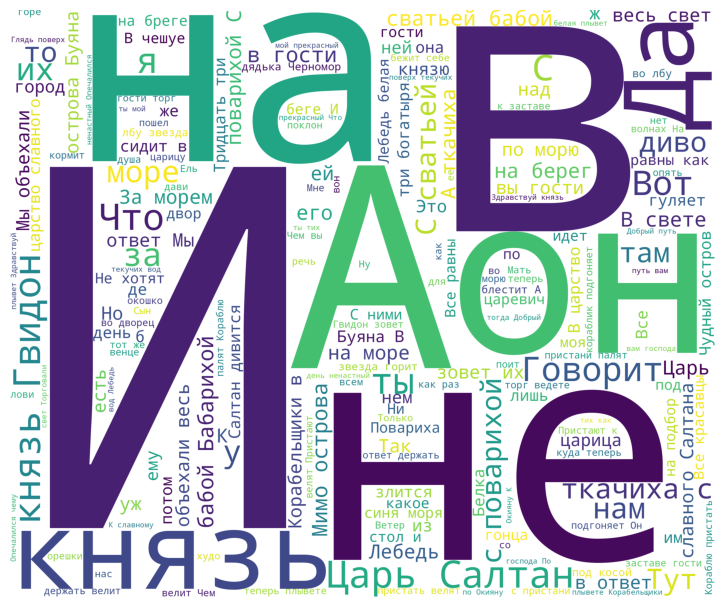

In [306]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [307]:
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['три', 'девицы', 'под', 'окном', 'пряли', 'поздно', 'вечерком', 'я', 'была', 'царица', 'говорит', 'одна', 'девица', 'то', 'на', 'весь', 'крещеный', 'мир', 'приготовила', 'б', 'я', 'я', 'была', 'царица', 'говорит', 'ее', 'сестрица', 'то', 'на', 'весь', 'бы', 'мир', 'одна', 'наткала', 'я', 'я', 'была', 'царица', 'третья', 'молвила', 'сестрица', 'я', 'б', 'для', 'батюшкицаря', 'родила', 'только', 'вымолвить', 'успела', 'дверь', 'тихонько', 'заскрыпела', 'и', 'в', 'светлицу', 'входит', 'царь', 'стороны', 'той', 'государь', 'во', 'всё', 'время', 'разговора', 'он', 'стоял', 'позадь', 'забора', 'речь', 'последней', 'по', 'всему', 'полюбилася', 'ему', 'красная', 'девица', 'говорит', 'он', 'будь', 'царица', 'и', 'роди', 'богатыря', 'мне', 'к', 'исходу', 'сентября', 'вы', 'ж', 'голубушкисестрицы', 'выбирайтесь', 'из', 'светлицы', 'поезжайте', 'вслед', 'за', 'мной', 'вслед', 'за', 'мной', 'и', 'за', 'сестрой', 'будь', 'одна', 'из', 'вас', 'ткачиха', 'а', 'другая', 'в', 'сени', 'вышел', 'царьотец

In [309]:
import nltk
from nltk.probability import FreqDist
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.most_common(5)


[('и', 153), ('в', 133), ('на', 74), ('с', 70), ('а', 59)]

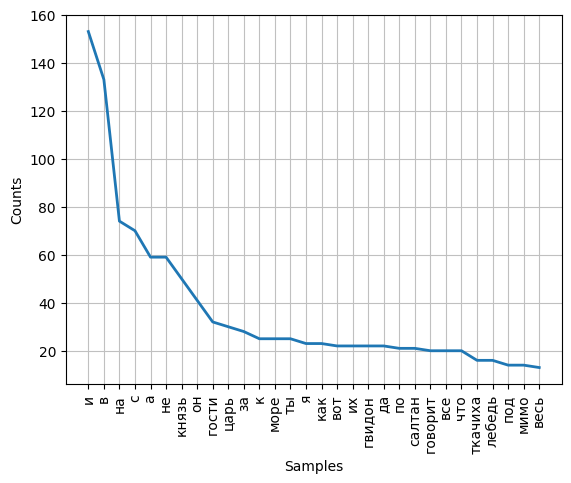

<Axes: xlabel='Samples', ylabel='Counts'>

In [310]:
fdist.plot(30,cumulative=False)

In [311]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words("russian")

tokens = [word for word in tokens if not word in english_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


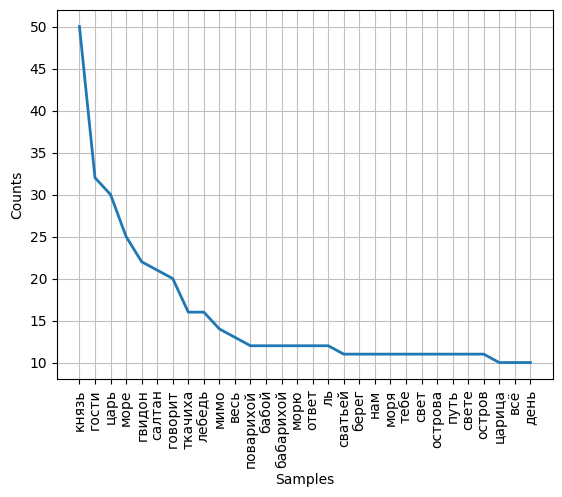

<Axes: xlabel='Samples', ylabel='Counts'>

In [312]:
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.plot(30,cumulative=False)

In [313]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(tokens))

<Axes: >

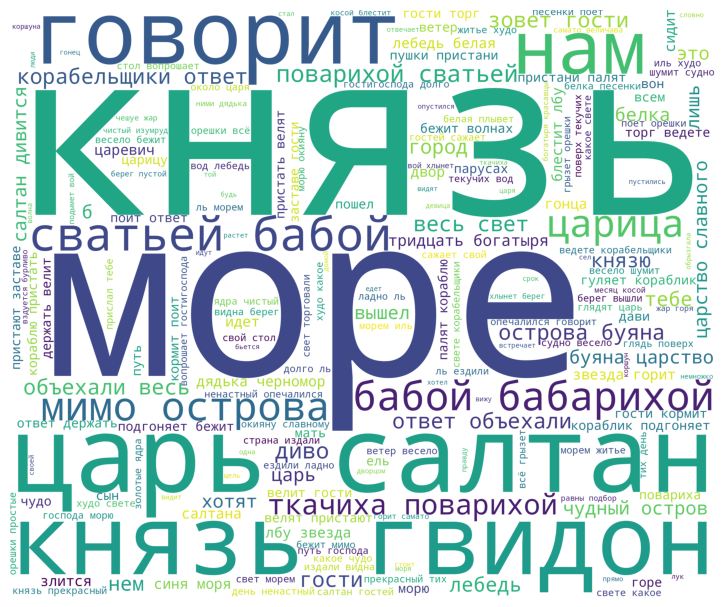

In [314]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [315]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
	# select sequence of tokens
	seq = tokens[i-length:i]
	# convert into a line
	line = ' '.join(seq)
	# store
	sequences.append(line)
print('Total Sequences: %d' % len(sequences))

# save sequences to file
out_filename = 'tsar.txt'
save_doc(sequences, out_filename)

Total Sequences: 2509


In [316]:
in_filename = 'tsar.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

In [317]:
lines[:2]

['девицы окном пряли поздно вечерком царица говорит одна девица весь крещеный мир приготовила б царица говорит сестрица весь мир одна наткала царица третья молвила сестрица б батюшкицаря родила вымолвить успела дверь тихонько заскрыпела светлицу входит царь стороны той государь всё время разговора стоял позадь забора речь последней всему полюбилася красная девица',
 'окном пряли поздно вечерком царица говорит одна девица весь крещеный мир приготовила б царица говорит сестрица весь мир одна наткала царица третья молвила сестрица б батюшкицаря родила вымолвить успела дверь тихонько заскрыпела светлицу входит царь стороны той государь всё время разговора стоял позадь забора речь последней всему полюбилася красная девица говорит']

In [318]:
# integer encode sequences of words
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
# получение уникальных токенов отсортированных по частоте повторяемости
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [319]:
sequences[:2]

[[1168,
  405,
  1165,
  1163,
  1161,
  51,
  7,
  401,
  265,
  15,
  1158,
  1139,
  1157,
  108,
  51,
  7,
  1125,
  15,
  1139,
  401,
  1150,
  51,
  1147,
  402,
  1125,
  108,
  1144,
  1143,
  1142,
  1141,
  1140,
  399,
  1137,
  1136,
  1134,
  3,
  1131,
  263,
  1130,
  30,
  1127,
  1126,
  1123,
  1122,
  1120,
  1118,
  1117,
  1115,
  1113,
  1112,
  265],
 [405,
  1165,
  1163,
  1161,
  51,
  7,
  401,
  265,
  15,
  1158,
  1139,
  1157,
  108,
  51,
  7,
  1125,
  15,
  1139,
  401,
  1150,
  51,
  1147,
  402,
  1125,
  108,
  1144,
  1143,
  1142,
  1141,
  1140,
  399,
  1137,
  1136,
  1134,
  3,
  1131,
  263,
  1130,
  30,
  1127,
  1126,
  1123,
  1122,
  1120,
  1118,
  1117,
  1115,
  1113,
  1112,
  265,
  7]]

In [320]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1169

In [321]:
# separate into input and output
import numpy as np
from keras.utils import to_categorical

sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
#кодирование выходных значений в двоичное матричное представление
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

In [330]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
# define model
model = Sequential()
#50 - это число выходов в Embedding слое
model.add(Embedding(vocab_size, 300, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 50, 300)           350700    
                                                                 
 lstm_40 (LSTM)              (None, 50, 100)           160400    
                                                                 
 lstm_41 (LSTM)              (None, 100)               80400     
                                                                 
 dense_40 (Dense)            (None, 100)               10100     
                                                                 
 dense_41 (Dense)            (None, 1169)              118069    
                                                                 
Total params: 719669 (2.75 MB)
Trainable params: 719669 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [331]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
20/20 [==============================] - 8s 199ms/step - loss: 7.0421 - accuracy: 0.0139
Epoch 2/100
20/20 [==============================] - 3s 153ms/step - loss: 6.7058 - accuracy: 0.0191
Epoch 3/100
20/20 [==============================] - 2s 103ms/step - loss: 6.4580 - accuracy: 0.0132
Epoch 4/100
20/20 [==============================] - 2s 88ms/step - loss: 6.2688 - accuracy: 0.0167
Epoch 5/100
20/20 [==============================] - 2s 83ms/step - loss: 6.1341 - accuracy: 0.0203
Epoch 6/100
20/20 [==============================] - 2s 125ms/step - loss: 6.0560 - accuracy: 0.0247
Epoch 7/100
20/20 [==============================] - 2s 85ms/step - loss: 5.9286 - accuracy: 0.0251
Epoch 8/100
20/20 [==============================] - 2s 87ms/step - loss: 5.7948 - accuracy: 0.0231
Epoch 9/100
20/20 [==============================] - 1s 52ms/step - loss: 5.6601 - accuracy: 0.0255
Epoch 10/100
20/20 [==============================] - 1s 57ms/step - loss: 5.4996 - accuracy: 0.

In [332]:
from pickle import dump
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [333]:
from keras.utils import pad_sequences
import numpy as np
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded),axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)


In [334]:
# load cleaned text sequences
in_filename = 'tsar.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [335]:
from keras.models import load_model
from pickle import load
# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [336]:
from random import randint
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

очутятся бреге чешуе жар горя тридцать богатыря красавцы удалые великаны молодые равны ними дядька черномор той стражи надежней храбрее прилежней князя женка глаз отвесть днем свет божий затмевает ночью землю освещает месяц косой блестит лбу звезда горит князь гвидон город правит всяк усердно славит прислал тебе поклон тебе пеняет намде гости



In [337]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

1/1 [==============================] - 0s 19ms/step
обещался доселе царь утерпел снарядить флот велел ткачиха поварихой сватьей бабой бабарихой хотят царя пустить чудный остров навестить салтан внимает унимает царь дитя говорит шутя нынче топнул вышел вон дверью хлопнул окном гвидон сидит молча море глядит шумит оно хлещет лишь едва едва трепещет лазоревой дали показались корабли равнинам окияна
